In [55]:
from sklearn import *
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import preprocessing
from matplotlib import style
style.use('ggplot')

In [56]:
sys.path.append('../utilities/')
from utils import *

In [3]:
dat = pd.read_csv('../CSVData/04.13.2019 vs UVA 2.csv')

In [4]:
dat.columns

Index(['#', 'Name', 'ClipType', 'Media In', 'Media Out', 'Hit Location X',
       'Hit Location Y', 'Hit Location', 'Hit Result', 'At Bat Pitch Count',
       'Batter', 'Bunt', 'Count', 'Inning', 'Outs', 'Pitch Location X',
       'Pitch Location Y', 'RBI', 'Total Pitch Count', 'Umpire', 'Strike Type',
       'Pitcher', 'Home Score', 'Home Team', 'Hit Type', 'Batter Strength',
       'Away Team', 'Ball Type', 'Base', 'Pitch Count', 'Pitch Type',
       'Team in Field', 'Team at Bat', 'Visitor Score'],
      dtype='object')

In [5]:
testDat = subset(dat, ['Pitch Location X', 'Pitch Location Y', 'Strike Type', 'Ball Type', 'Umpire'])
testDat['Result'] = np.nan

In [6]:
for idx, ball in enumerate(testDat['Ball Type']):
    if(type(ball) == str):
        testDat['Result'][idx] = ball
    else:
        testDat['Result'][idx] = testDat['Strike Type'][idx]

/home/nmaynard/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/nmaynard/.local/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/nmaynard/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ip

In [7]:
strikes = testDat.loc[testDat['Result'] == 'Take']
balls = testDat.loc[testDat['Result'] == 'Ball']

strikes = subset(strikes, ['Pitch Location X', 'Pitch Location Y'])

balls = subset(balls, ['Pitch Location X', 'Pitch Location Y'])

dataDict = {-1:np.array(strikes),
           1:np.array(balls)}

In [8]:
frame = testDat.loc[testDat['Result'].isin(['Take', 'Ball'])]
frame['Result'] = frame['Result'].replace('Take', 1.0)
frame['Result'] = frame['Result'].replace('Ball', -1.0)
vec = np.array(subset(frame, ['Pitch Location X', 'Pitch Location Y']))
label = frame['Result']

/home/nmaynard/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/nmaynard/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf.fit(vec, label)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [10]:
clf = svm.SVC(gamma='scale', cache_size=7000, kernel='rbf')

In [11]:
clf.fit(vec, label)

SVC(C=1.0, cache_size=7000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
clf.predict(vec)

array([ 1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,
        1., -1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1.,
       -1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1.,
        1.,  1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1.,
       -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1.,
        1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,
        1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,
       -1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,
       -1., -1., -1.])

In [13]:
np.array(label)

array([ 1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.,
        1., -1., -1.,  1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1.,
       -1., -1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,  1., -1., -1.,
        1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1.,
       -1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1., -1.,
        1., -1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1., -1.,
        1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,
       -1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,
       -1.,  1., -1.])

In [14]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = [-10, 240]
    ylim = [250, -10]
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='purple',
               levels=[0], alpha=0.6,
               linestyles=['-'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.hlines(y=50, xmin=60, xmax=185, linewidth=2, color='g', alpha = 0.3)
    ax.hlines(y=190, xmin=60, xmax=185, linewidth=2, color='g', alpha = 0.3)
    ax.vlines(x=60, ymin=50, ymax=190, linewidth=2, color='g', alpha = 0.3)
    ax.vlines(x=185, ymin=50, ymax=190, linewidth=2, color='g', alpha = 0.3)

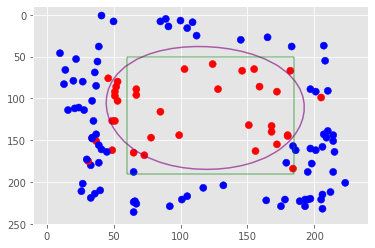

In [15]:
plt.scatter(vec[:, 0], vec[:, 1], c=label, s=50, cmap='bwr')
plot_svc_decision_function(clf)

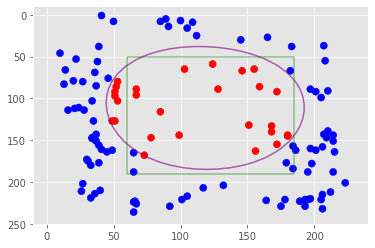

In [16]:
preds = clf.predict(vec)
plt.scatter(vec[:, 0], vec[:, 1], c=preds, s=50, cmap='bwr')
plot_svc_decision_function(clf)

In [98]:
locs = pd.read_csv('../../PyTorch-YOLOv3/detect/output.csv', sep = " ", header = None)

In [99]:
locs.columns = ['x', 'y', 'x1', 'y1', 'x4', 'y4']
len(locs)
locs.x = locs.x + 60
locs.y = locs.y + 50

In [101]:
x = locs.x[[34, 94, 211, 230]]
y = locs.y[[34, 94, 211, 230]]
x

34      27
94     -88
211   -100
230     83
Name: x, dtype: int64

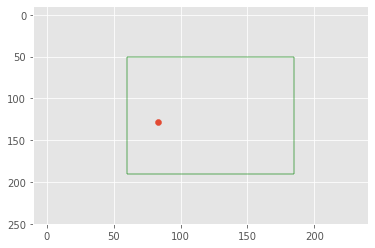

In [102]:
plt.scatter(x, y)
plt.xlim(-10, 240)
plt.ylim(250, -10)

plt.hlines(y=50, xmin=60, xmax=185, linewidth=2, color='g', alpha = 0.3)
plt.hlines(y=190, xmin=60, xmax=185, linewidth=2, color='g', alpha = 0.3)
plt.vlines(x=60, ymin=50, ymax=190, linewidth=2, color='g', alpha = 0.3)
plt.vlines(x=185, ymin=50, ymax=190, linewidth=2, color='g', alpha = 0.3)
#plt.hlines(y=59, xmin=80, xmax=166, linewidth=2, color='g', alpha = 0.3)
#plt.hlines(y=178, xmin=80, xmax=166, linewidth=2, color='g', alpha = 0.3)
#plt.vlines(x=80, ymin=59, ymax=178, linewidth=2, color='g', alpha = 0.3)
#plt.vlines(x=166, ymin=59, ymax=178, linewidth=2, color='g', alpha = 0.3)